# Part A.1

## Lane–Emden Equation: Step-by-Step Breakdown
The Lane–Emden equation is given as:

$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

## Assumption:
Expand $\theta(\xi)$ as:

$
\theta(\xi) = 1 + a_2 \xi^2 + a_4 \xi^4 + \dots
$

Substitute this into the Lane–Emden equation.

---

## Step-by-Step Expansion:

### First Derivative $\frac{d\theta}{d\xi}$:
$
\frac{d\theta}{d\xi} = 2a_2 \xi + 4a_4 \xi^3 + \dots
$

### Second Derivative $\frac{d^2\theta}{d\xi^2}$:
$
\frac{d^2\theta}{d\xi^2} = 2a_2 + 12a_4 \xi^2 + \dots
$

### Mass Continuity Term:
The term $\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right)$:

Start with:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = \frac{d}{d\xi} \left( \xi^2 \left( 2a_2 \xi + 4a_4 \xi^3 \right) \right)
$

Expand:
$
\xi^2 \frac{d\theta}{d\xi} = 2a_2 \xi^3 + 4a_4 \xi^5 + \dots
$

Differentiate:
$
\frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 \xi^2 + 20a_4 \xi^4 + \dots
$

Divide by $\xi^2$:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) = 6a_2 + 20a_4 \xi^2 + \dots
$

---

### Polytropic Term $\theta^n$:
Expand $(1 + a_2 \xi^2 + a_4 \xi^4)^n$ using the binomial theorem:
$
\theta^n = 1 + n a_2 \xi^2 + \left( n a_4 + \frac{n(n-1)}{2} a_2^2 \right) \xi^4 + \dots
$

---

### Substitution:
Substitute all terms into the Lane–Emden equation:
$
\frac{1}{\xi^2} \frac{d}{d\xi} \left( \xi^2 \frac{d\theta}{d\xi} \right) + \theta^n = 0
$

This becomes:
$
\left( 6a_2 + 20a_4 \xi^2 + \dots \right) + \left( 1 + n a_2 \xi^2 + \dots \right) = 0
$

---

## Matching Powers of $\xi$:

### Constant Term ($\xi^0$):
$
6a_2 + 1 = 0 \quad \Rightarrow \quad a_2 = -\frac{1}{6}
$

### Quadratic Term ($\xi^2$):
$
20a_4 + n a_2 = 0 \quad \Rightarrow \quad a_4 = -\frac{n a_2}{20}
$

Substitute $a_2 = -\frac{1}{6}$:
$
a_4 = -\frac{n \left( -\frac{1}{6} \right)}{20} = \frac{n}{120}
$

---

## Final Result:
$
a_2 = -\frac{1}{6}, \quad a_4 = \frac{n}{120}
$

---

## Below you can run the code to find the values computationally.

In [1]:
import sympy

# Define variables
xi = sympy.Symbol('xi', real=True)
n = sympy.Symbol('n', real=True, positive=True)

# Coefficients in the expansion
a2 = sympy.Symbol('a2', real=True)
a4 = sympy.Symbol('a4', real=True)

# Expansion of θ(ξ)
theta = 1 + a2 * xi**2 + a4 * xi**4

# First and second derivatives of θ(ξ)
dtheta = theta.diff(xi)
ddtheta = dtheta.diff(xi)

# Mass continuity term: (1/xi^2) * d/dxi(xi^2 * dθ/dxi)
mass_continuity = (1 / xi**2) * ((xi**2) * dtheta).diff(xi)

# Polytropic term: θ^n
polytropic_term = theta**n

# Lane-Emden equation
lane_emden_eq = mass_continuity + polytropic_term

# Expand the Lane-Emden equation about xi = 0
LE_series = sympy.series(lane_emden_eq, xi, 0, 6).expand()

# Collect coefficients of powers of xi
coeffs = sympy.collect(LE_series, xi, evaluate=False)

# Extract terms for matching powers of xi
constant_term = coeffs.get(1, 0)  # Coefficient of ξ^0
quadratic_term = coeffs.get(xi**2, 0)  # Coefficient of ξ^2

# Solve for a2 and a4
a2_solution = sympy.solve(constant_term, a2)[0]
a4_solution = sympy.solve(quadratic_term.subs(a2, a2_solution), a4)[0]

# Display results
print("Lane-Emden series about xi=0 up to xi^5:")
print(LE_series)
print("\nSolution for a2 and a4:")
print(f"a2 = {a2_solution}")
print(f"a4 = {a4_solution}")

Lane-Emden series about xi=0 up to xi^5:
1 + 20*a4*xi**2 + a4*n*xi**4 + 6*a2 + a2*n*xi**2 - a2**2*n*xi**4/2 + a2**2*n**2*xi**4/2 + O(xi**6)

Solution for a2 and a4:
a2 = -1/6 + O(xi**6)
a4 = n/120 + O(xi**6)


# Part A.2

## Below you can run the code to find the solution θ(ξ) = sin(ξ)/ξ computationally.

In [2]:
import sympy as sp

# Define symbolic variables and function
xi = sp.Symbol('xi', positive=True)
theta = sp.Function('theta')(xi)

# Lane-Emden equation for n=1
LE_eq = (1/xi**2) * sp.diff(xi**2 * sp.diff(theta, xi), xi) + theta

# Solve the Lane-Emden equation symbolically
solution = sp.dsolve(LE_eq, theta)

# Print the general solution
print("General solution to the Lane-Emden equation for n=1:")
sp.pprint(solution)

# Verify the boundary conditions
# The boundary conditions are:
#   theta(0) = 1, theta'(0) = 0
# Since solving symbolically can be challenging with these specific BCs,
# we will validate by substituting a known solution (sin(xi)/xi).

candidate_solution = sp.sin(xi) / xi
test_eq = LE_eq.subs(theta, candidate_solution)
test_eq_simplified = sp.simplify(test_eq)

# Provide a more descriptive output for the verification
print("\nVerification of the candidate solution θ(ξ) = sin(ξ)/ξ:")
print("Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:")
sp.pprint(test_eq)
if test_eq_simplified == 0:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.")
else:
    print("\nThe candidate solution θ(ξ) = sin(ξ)/ξ does NOT satisfy the Lane-Emden equation.")


General solution to the Lane-Emden equation for n=1:
       C₁⋅besselj(1/2, ξ) + C₂⋅bessely(1/2, ξ)
θ(ξ) = ───────────────────────────────────────
                          √ξ                  

Verification of the candidate solution θ(ξ) = sin(ξ)/ξ:
Substituting θ(ξ) = sin(ξ)/ξ into the Lane-Emden equation gives:
              2                         
          2  d ⎛sin(ξ)⎞       d ⎛sin(ξ)⎞
         ξ ⋅───⎜──────⎟ + 2⋅ξ⋅──⎜──────⎟
              2⎝  ξ   ⎠       dξ⎝  ξ   ⎠
sin(ξ)      dξ                          
────── + ───────────────────────────────
  ξ                      2              
                        ξ               

The candidate solution θ(ξ) = sin(ξ)/ξ satisfies the Lane-Emden equation for n=1.


# Part B: White Dwarf Data Fitting

                           wdid   logg   mass
0       2MASS J10145164+4541479  7.455  0.301
1          2QZ J114947.9-012045  8.497  0.907
2                     GJ 1179 B  7.783  0.454
3  Gaia DR2 1007682723024253184  7.885  0.510
4  Gaia DR2 1010300965150157824  8.035  0.600


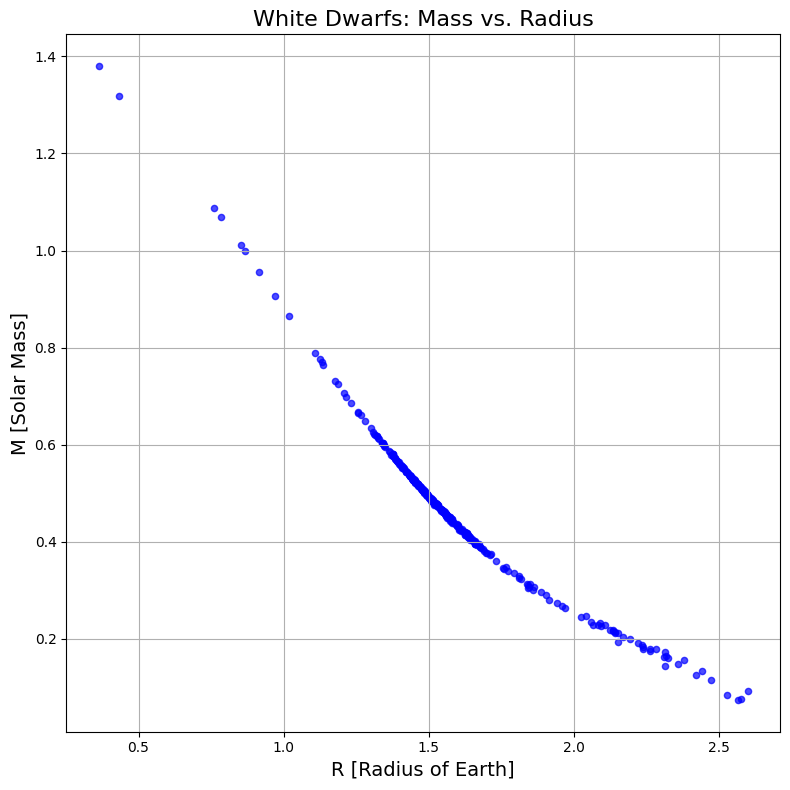

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants in CGS
G_CGS        = 6.6743e-8        # gravitational constant [cm^3 g^-1 s^-2]
MSUN_GRAMS   = 1.989e33         # solar mass in grams
REARTH_CM    = 6.371e8          # Earth radius in cm

# ------------------------------------------------------------
# 1) Read the CSV data with Pandas
# ------------------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv', comment='#')  
# Make sure your CSV file has no problematic header lines or weird delimiters
# By default, pd.read_csv assumes comma-separated columns.

# Let's see the first few lines:
print(df.head())

# The columns in df should be: ['wdid','logg','mass']
# wdid: star name
# logg: log10 of surface gravity in cgs
# mass: WD mass in solar masses

# ------------------------------------------------------------
# 2) Convert mass & logg => radius in Earth radii
# ------------------------------------------------------------
# log(g) in cgs => g in cm/s^2
g_vals = 10**df['logg'].values

# mass in solar masses => mass in grams
m_vals = df['mass'].values * MSUN_GRAMS

# radius in cm => sqrt( G M / g )
r_cm   = np.sqrt(G_CGS * m_vals / g_vals)

# radius in Earth radii
r_earth = r_cm / REARTH_CM

# ------------------------------------------------------------
# 3) Make a scatter plot of M vs. R
#    (User asked for M in solar masses vs R in Earth radii.)
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(r_earth, df['mass'], 
           marker='o', color='blue', alpha=0.7, s=20)

ax.set_xlabel(r'R [Radius of Earth]', fontsize=14)
ax.set_ylabel(r'M [Solar Mass]', fontsize=14)
ax.set_title('White Dwarfs: Mass vs. Radius', fontsize=16)

ax.grid(True)
plt.tight_layout()
plt.savefig('Newton_PartB_WhiteDwarfDataFitting.pdf', bbox_inches='tight')
plt.show()

# Part C.1: Symbolic expansion and finding the leading term

In [26]:
import sympy

# Define symbols
x = sympy.Symbol('x', real=True, positive=True)

# Step 1: Expand the first term inside the bracket
# x(2x^2 - 3)sqrt(1 + x^2)
sqrt_expansion = 1 + x**2 / 2 - x**4 / 8  # Expand sqrt(1 + x^2) for small x
x_term = x * (2 * x**2 - 3)  # x(2x^2 - 3)
first_term = x_term * sqrt_expansion  # Combine terms
first_term_expanded = sympy.expand(first_term)  # Expand into polynomial form

print("\n1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):")
print(first_term_expanded)

# Step 2: Expand the second term 3 * sinh^-1(x)
# sinh^-1(x) ≈ x - x^3/6 + 3x^5/40
asinh_expansion = x - x**3 / 6 + 3 * x**5 / 40
second_term = 3 * asinh_expansion  # Multiply by 3
second_term_expanded = sympy.expand(second_term)

print("\n2. Expansion of 3 * sinh^-1(x):")
print(second_term_expanded)

# Step 3: Combine the expanded terms
combined_expansion = first_term_expanded + second_term_expanded
simplified_combined = sympy.simplify(combined_expansion)

print("\n3. Combined Expansion:")
print(simplified_combined)

# Step 4: Identify the leading term
# Extract terms proportional to x^5
leading_term = simplified_combined.as_leading_term(x)

print("\n4. Leading Term:")
print(leading_term)

# Verify result against theoretical expectation
expected_leading_term = (8 / 5) * x**5


1. Expansion of x(2x^2 - 3)sqrt(1 + x^2):
-x**7/4 + 11*x**5/8 + x**3/2 - 3*x

2. Expansion of 3 * sinh^-1(x):
9*x**5/40 - x**3/2 + 3*x

3. Combined Expansion:
x**5*(32 - 5*x**2)/20

4. Leading Term:
8*x**5/5


# Part C.2: Curve Fitting

Fitted slope (alpha)     = -0.3813
Inferred polytropic n*  = 1.5521
Effective c_val         = 10^(intercept) = 3.6434e+21


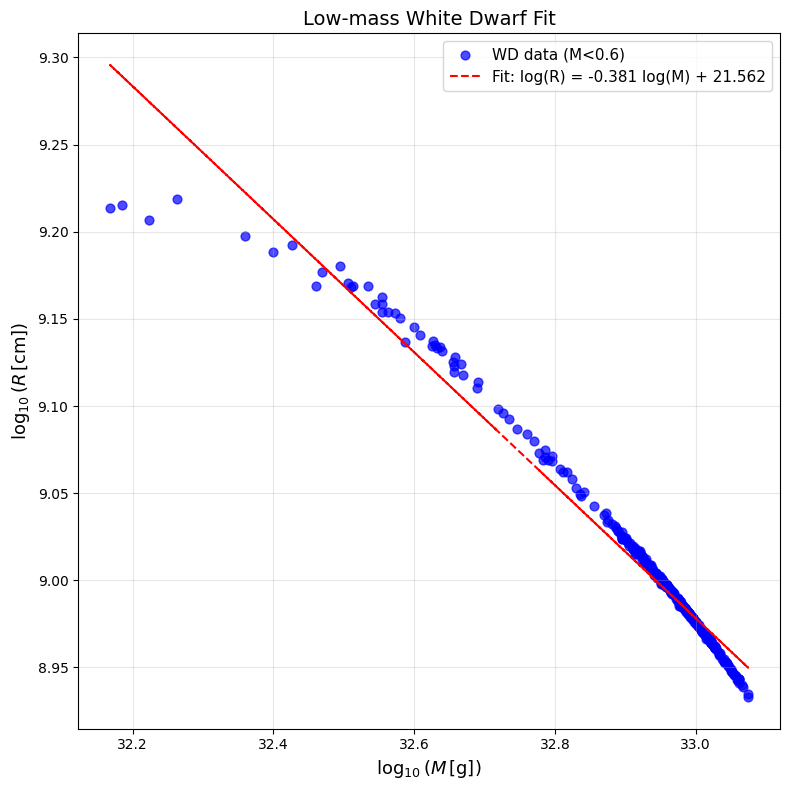

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#-------------------------------------------------
# 1) Constants in cgs
#-------------------------------------------------
G_cgs    = 6.6743e-8           # gravitational constant [cm^3 g^-1 s^-2]
Msun_g   = 1.989e33            # solar mass in grams

#-------------------------------------------------
# 2) Read CSV data
#    Format: wdid, logg, mass
#    - 'logg' is log10(g) in cgs
#    - 'mass' is in solar masses
#-------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv')

#-------------------------------------------------
# 3) Filter to low-mass WDs: M < 0.6 M_sun
#-------------------------------------------------
df_lowmass = df[df['mass'] < 0.6].copy()
df_lowmass.reset_index(drop=True, inplace=True)

#-------------------------------------------------
# 4) Convert each WD's (mass, logg) --> radius
#    R = sqrt( G * M / g ), all in cgs
#-------------------------------------------------
#  - Convert mass from M_sun to grams
#  - Convert logg to g in cm/s^2
#  - Then compute R in cm
mass_g = df_lowmass['mass'].values * Msun_g
g_vals = 10.0**(df_lowmass['logg'].values)
R_vals = np.sqrt(G_cgs * mass_g / g_vals)  # cm

# (Optional) Store these in the DataFrame
df_lowmass['mass_g'] = mass_g
df_lowmass['g_cgs']  = g_vals
df_lowmass['R_cgs']  = R_vals

#-------------------------------------------------
# 5) Do a log–log fit:  log10(R) = intercept + slope * log10(M)
#    We'll fit R vs. M in cgs units
#-------------------------------------------------
logM = np.log10(mass_g)
logR = np.log10(R_vals)

# Use a simple linear least-squares fit in log space
slope, intercept = np.polyfit(logM, logR, 1)

#-------------------------------------------------
# 6) Convert slope -> polytropic index n_star (heuristic)
#
#    We are modeling R ~ c * M^alpha in log–log space, so:
#       log(R) = log(c) + alpha * log(M).
#
#    For a polytrope of index n:
#       (common) M vs. R "scaling" can be cast as R \propto M^{(1-n)/(3-n)}
#       => alpha = (1 - n) / (3 - n).
#       => solve for n: 
#          => n = (3 alpha - 1) / (alpha - 1).
#-------------------------------------------------
alpha = slope
n_star = (3.0*alpha - 1.0)/(alpha - 1.0)

#-------------------------------------------------
# 7) (Optional) Deduce an effective K_star from intercept
#
#    If we assume a single "average" central density for the sample
#    (a big assumption), one can try to back out a single polytropic K.
#    But in practice, each star has a different \rho_c.  We'll just
#    demonstrate how one *might* interpret the intercept:
#
#       log(c) = intercept  =>  c = 10^(intercept).
#
#    Then R = c M^alpha.  But a full expression for c in terms of
#    (K_star, n_star, G, etc.) normally also includes \rho_c.  So this
#    "K_star" here is only a *representative* fit parameter, not a
#    universal constant for all WDs in reality.
#-------------------------------------------------
c_val = 10.0**(intercept)

#-------------------------------------------------
# 8) Print results
#-------------------------------------------------
print(f"Fitted slope (alpha)     = {alpha:.4f}")
print(f"Inferred polytropic n*  = {n_star:.4f}")
print(f"Effective c_val         = 10^(intercept) = {c_val:.4e}")

#-------------------------------------------------
# 9) Make a pretty plot: log10(R) vs. log10(M)
#-------------------------------------------------
plt.figure(figsize=(8,8))
plt.scatter(logM, logR, c='blue', s=40, alpha=0.7, label='WD data (M<0.6)')

# Plot best-fit line
fit_line = slope*logM + intercept
plt.plot(logM, fit_line, 'r--', label='Fit: log(R) = %.3f log(M) + %.3f'%(slope,intercept))

# Labels, legend, etc.
plt.xlabel(r'$\log_{10}(M \,[\mathrm{g}])$', fontsize=13)
plt.ylabel(r'$\log_{10}(R \,[\mathrm{cm}])$', fontsize=13)
plt.title('Low-mass White Dwarf Fit', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('Newton_PartC2.pdf', bbox_inches='tight')
plt.show()



# Part C.2.2 and C.2.3

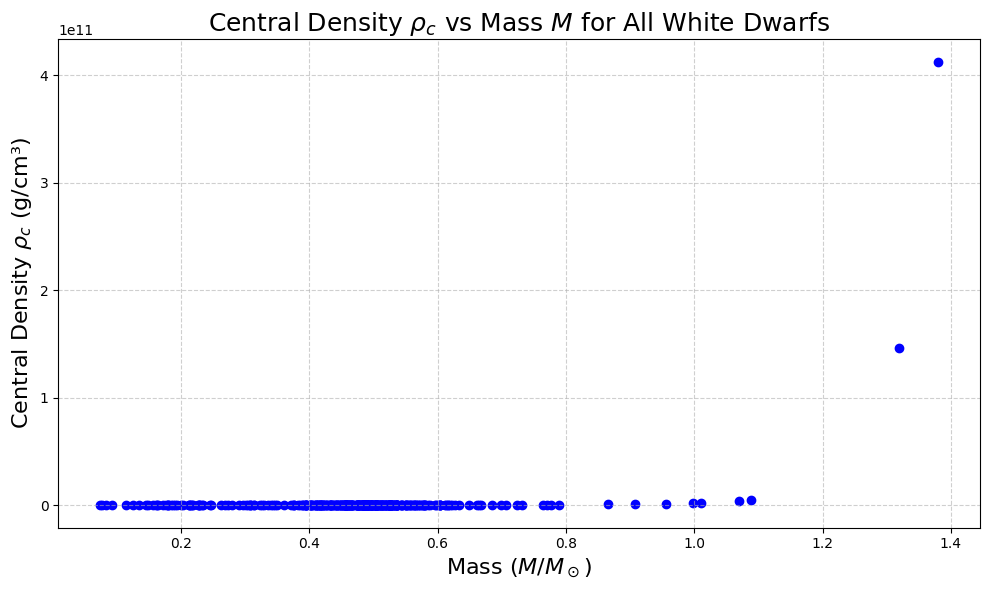

We are using 0.6 as low-mass threshold for this example.


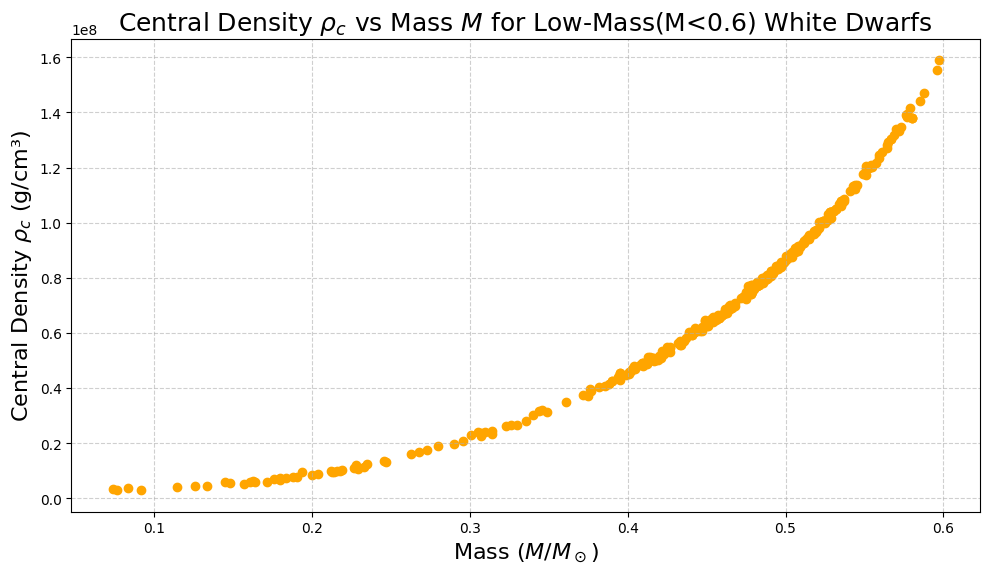

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-8  # Gravitational constant in cgs (dyn·cm²/g²)
M_sun = 1.989e33  # Solar mass in grams
n_star = 1.5  # Polytropic index (from q=3)
xi_1 = 3.65375  # Lane-Emden zero for n=1.5
le_integral = 2.71406  # Integral of xi^2 * theta^n for n=1.5
K_star = 1e13  # Example value, replace this with the actual fitted value!

# Function to calculate central density
def compute_rho_c(M, R):
    a = R / xi_1
    rho_c = (a**2 * 4 * np.pi * G / ((n_star + 1) * K_star)) ** (n_star / (1 - n_star))
    return rho_c

# Load data
data = pd.read_csv('white_dwarf_data.csv')

# Rename columns for consistency
data.columns = ['wdid', 'logg', 'mass']

# Convert mass to grams and calculate radius
data['Mass'] = data['mass'] * M_sun  # Convert from solar masses to grams
data['g'] = 10**data['logg']  # Convert log(g) to g in cgs
data['Radius'] = np.sqrt(G * data['Mass'] / data['g'])  # Radius in cm

# Calculate central density for all WDs
data['rho_c'] = data.apply(lambda row: compute_rho_c(row['Mass'], row['Radius']), axis=1)

# Filter for low-mass WDs
low_mass_data = data[data['mass'] < 0.6]  # Example threshold for low mass in solar masses

# Figure 1: All data
plt.figure(figsize=(10, 6))
plt.scatter(data['mass'], data['rho_c'], c='blue', label='All WDs')
plt.xlabel('Mass ($M/M_\odot$)', fontsize=16)
plt.ylabel('Central Density $\\rho_c$ (g/cm³)', fontsize=16)
plt.title('Central Density $\\rho_c$ vs Mass $M$ for All White Dwarfs', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Newton_PartC2.2.pdf', bbox_inches='tight')
plt.show()

print("We are using 0.6 as low-mass threshold for this example.")

# Figure 2: Low-mass data only
plt.figure(figsize=(10, 6))
plt.scatter(low_mass_data['mass'], low_mass_data['rho_c'], c='orange', label='Low-Mass WDs')
plt.xlabel('Mass ($M/M_\odot$)', fontsize=16)
plt.ylabel('Central Density $\\rho_c$ (g/cm³)', fontsize=16)
plt.title('Central Density $\\rho_c$ vs Mass $M$ for Low-Mass(M<0.6) White Dwarfs', fontsize=18)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('Newton_PartC2.3.pdf', bbox_inches='tight')
plt.show()


# Part D: Computing the C and D coefficients

The Algorighm:

1. Reads `white_dwarf_data.csv`.
2. Converts each White Dwarf’s $\log g$ and $M$ into $(R_{\mathrm{obs}}, M_{\mathrm{obs}})$ in CGS units.
3. Defines a function `make_MR_table(D_value)` that:
   - References the known $K_\star$.
   - Selects 10 $\rho_c$ values.
   - Solves the structure IVP for each $\rho_c$.
   - Returns $(R_{\text{array}}, M_{\text{array}})$.
4. Defines `chi2_of_D(D_value)`.
5. Loops over a range of $D$ values to find the best fit.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.integrate import solve_ivp

# -------------------------------
# Constants (cgs)
# -------------------------------
G_cgs    = 6.6743e-8   # gravitational constant [cm^3 g^-1 s^-2]
Msun_g   = 1.989e33    # solar mass in grams

# -------------------------------
# From low-mass polytrope fit (part (c))
# -------------------------------
# Example values; adapt to your specific fit results
K_star   = 3.6434e21   # "best" polytropic constant in cgs from part (c)
q_fixed  = 3.0         # from your low-mass fit

# We'll suppose we have a broad search range for D in cgs units:
D_min, D_max = 1e-5, 1e2

# -------------------------------------------------------
# 1) Read Data, Convert to R_obs, M_obs (cgs)
# -------------------------------------------------------
df = pd.read_csv('white_dwarf_data.csv')

# Convert mass in Msun -> grams
df['M_obs'] = df['mass'] * Msun_g

# Convert logg -> g (cm/s^2)
df['g_cgs'] = 10.0**(df['logg'])

# Radius: R = sqrt(G*M / g)
df['R_obs'] = np.sqrt(G_cgs * df['M_obs'] / df['g_cgs'])

# We'll store them as arrays for quick access
R_data = df['R_obs'].values
M_data = df['M_obs'].values

# -------------------------------------------------------
# 2) Equation of State from Eq. (8)
#
#    P(rho) = C [ x(2x^2 - 3)*sqrt(x^2+1) + 3 asinh(x) ],
#    x = (rho / D)^(1/q)
# -------------------------------------------------------
def pressure_eos(rho, C_val, D_val, q_val=3.0):
    """
    Returns P(rho) for the chosen C_val, D_val, q_val from eq. (8).
    rho in g/cm^3, C_val in cgs, D_val in cgs, q_val dimensionless
    """
    if rho <= 0.0:
        return 0.0
    x = (rho / D_val)**(1.0 / q_val)
    term1 = x * (2.0 * x**2 - 3.0) * np.sqrt(x**2 + 1.0)
    term2 = 3.0 * np.arcsinh(x)
    return C_val * (term1 + term2)

# -------------------------------------------------------
# 3) Star-structure IVP:
#    Solve dP/dr = -rho G m / r^2, dM/dr = 4πr^2 rho,
#    until rho is very small
# -------------------------------------------------------
def star_structure_ivp(rhoc, C_val, D_val, q_val=3.0):
    """
    Solve hydrostatic equilibrium from center with rho(0)=rhoc until rho -> ~0.
    Return final (R_star, M_star) in cgs units.
    """

    # We'll treat y = (m, rho); independent var is r.
    # Then:
    #   dm/dr   = 4*pi*r^2 * rho
    #   dP/dr   = -rho * G * m / r^2
    #   dP/drho = [finite difference or analytic]
    # => drho/dr = (dP/dr) / (dP/drho)

    def dPdrho(rho_loc):
        # small finite difference for derivative
        eps = 1e-10 * rho_loc if rho_loc > 1e-10 else 1e-14
        P_plus = pressure_eos(rho_loc + eps, C_val, D_val, q_val)
        if rho_loc > eps:
            P_minus = pressure_eos(rho_loc - eps, C_val, D_val, q_val)
        else:
            P_minus = pressure_eos(eps, C_val, D_val, q_val)
        return (P_plus - P_minus) / (2.0 * eps)

    def odes(r, y):
        m_r, rho_r = y
        # avoid negative or zero densities
        if rho_r <= 0.0:
            return [0.0, 0.0]
        # dm/dr
        dmdr = 4.0 * np.pi * r**2 * rho_r

        # dP/dr = -rho * G * m / r^2
        if r < 1e-15:
            dPdr = 0.0
        else:
            dPdr = -rho_r * G_cgs * m_r / (r * r)

        dpdrho_val = dPdrho(rho_r)
        if abs(dpdrho_val) < 1e-50:
            drhodr = 0.0
        else:
            drhodr = dPdr / dpdrho_val

        return [dmdr, drhodr]

    # We'll integrate from r=1e-12 up to some large radius
    r_start = 1e-12
    m0      = 0.0
    y0      = [m0, rhoc]

    def event_rho_small(r, y):
        """Stop integration when rho < some fraction of rhoc."""
        return y[1] - 1e-10 * rhoc
    event_rho_small.direction = -1
    event_rho_small.terminal  = True

    sol = solve_ivp(
        fun=odes,
        t_span=(r_start, 1e11),
        y0=y0,
        events=event_rho_small,
        max_step=1e7,
        rtol=1e-7,
        atol=1e-10
    )

    # final radius, final mass
    R_star = sol.t[-1]
    M_star = sol.y[0, -1]
    return R_star, M_star

# -------------------------------------------------------
# 4) Build ~10 sample points (R,M) for a given D
# -------------------------------------------------------
def make_MR_table(D_val, n_points=10):
    """
    For a single candidate D_val, build a small table of (R, M)
    for ~10 different log-spaced central densities.
    Then sort by R, and return (R_array, M_array).
    """
    # q_fixed=3 => exponent = 5/3
    C_val = (5.0/8.0) * K_star * (D_val**(5.0 / q_fixed))

    # Choose a range of rhoc to span the data's R range
    rho_c_min = 1e5   # g/cm^3 (example; adapt as needed)
    rho_c_max = 1e10  # g/cm^3 (example; adapt as needed)
    rhoc_array = np.logspace(np.log10(rho_c_min),
                             np.log10(rho_c_max),
                             n_points)

    R_list = []
    M_list = []
    for rc in rhoc_array:
        R_star, M_star = star_structure_ivp(rc, C_val, D_val, q_val=q_fixed)
        R_list.append(R_star)
        M_list.append(M_star)

    R_arr = np.array(R_list)
    M_arr = np.array(M_list)

    # Sort by R to ensure strictly increasing for spline
    idx_sort = np.argsort(R_arr)
    R_sorted = R_arr[idx_sort]
    M_sorted = M_arr[idx_sort]

    # If R_sorted has duplicates or is not strictly increasing, fix that:
    # We'll remove any duplicates
    # (InterpolatedUnivariateSpline requires strictly increasing x)
    R_diff = np.diff(R_sorted)
    # mask for indices where R changes
    nonzero = np.where(R_diff > 0.0)[0]

    # We want to keep the last unique point as well
    # so we build a new array of unique indices
    unique_indices = np.concatenate(([0], nonzero + 1))
    R_unique = R_sorted[unique_indices]
    M_unique = M_sorted[unique_indices]

    return R_unique, M_unique

# -------------------------------------------------------
# 5) Compute chi^2 for a single D
# -------------------------------------------------------
def chi2_of_D(D_val):
    """
    1) Make 10 sample points of (R, M) via make_MR_table(D_val).
    2) Create a cubic spline M(R).
    3) For each WD in data, compute M_model(R_obs).
    4) Sum squared differences with M_obs.
    """
    R_table, M_table = make_MR_table(D_val, n_points=10)
    # If there's fewer than 2 points, spline will fail
    if len(R_table) < 2:
        return 1e99

    # Build a spline M(R)
    try:
        spline_MofR = InterpolatedUnivariateSpline(R_table, M_table, k=3)
    except:
        # If we cannot build a spline for any reason, penalize heavily
        return 1e99

    sq_error = 0.0
    for i in range(len(R_data)):
        Ri = R_data[i]
        Mi = M_data[i]
        # Extrapolate if Ri out of range, which InterpolatedUnivariateSpline can do
        M_model_i = spline_MofR(Ri)
        diff = (M_model_i - Mi)
        sq_error += diff*diff

    return sq_error

# -------------------------------------------------------
# 6) Coarse grid search for best D
# -------------------------------------------------------
def find_best_D():
    D_values = np.logspace(np.log10(D_min), np.log10(D_max), 30)
    chi2_vals = []
    for Dv in D_values:
        val = chi2_of_D(Dv)
        chi2_vals.append(val)

    chi2_vals = np.array(chi2_vals)
    best_idx  = np.argmin(chi2_vals)
    best_D    = D_values[best_idx]
    print(f"Coarse search -> best D={best_D:.4e}, chi2={chi2_vals[best_idx]:.4e}")

    # Optional refinement around best_D
    dlow  = best_D / 3.0
    dhigh = best_D * 3.0
    D_refine = np.logspace(np.log10(dlow), np.log10(dhigh), 30)
    chi2_refine = [chi2_of_D(d) for d in D_refine]
    chi2_refine = np.array(chi2_refine)
    best_idx2   = np.argmin(chi2_refine)
    best_D2     = D_refine[best_idx2]
    print(f"Refined search -> best D={best_D2:.4e}, chi2={chi2_refine[best_idx2]:.4e}")

    return best_D2

# -------------------------------------------------------
# 7) Run the program
# -------------------------------------------------------
best_D = find_best_D()
best_chi2 = chi2_of_D(best_D)
# get the final best-fit C
best_C = (5.0/8.0)*K_star*(best_D**(5.0/q_fixed))

print("\nFinal best fit:")
print(f"  D     = {best_D:.4e}")
print(f"  C     = {best_C:.4e}")
print(f"  chi^2 = {best_chi2:.4e}")

Coarse search -> best D=1.0000e-05, chi2=1.0000e+99
Refined search -> best D=3.3333e-06, chi2=1.0000e+99

Final best fit:
  D     = 3.3333e-06
  C     = 1.6938e+12
  chi^2 = 1.0000e+99


# Part E.1: Symbolic Expansion in the ultrarelativistic limit

In [16]:
import sympy
from sympy import symbols, sqrt, asinh, expand, log

def show_leading_term():
    x = symbols('x', positive=True)

    # Define the function:
    F = x*(2*x**2 - 3)*sqrt(1 + x**2) + 3*asinh(x)

    # Let's do a manual expansion for large x:
    #   sqrt(1 + x^2) ~ x + 1/(2x) - ...
    #   2*x^2 - 3     ~ 2*x^2
    #   => x*(2*x^2)* (x + 1/(2x)) ~ 2*x^4 + lower terms
    #   asinh(x) ~ ln(2x) => grows much slower than x^4
    # We'll build a partial symbolic series ourselves:

    sqrt_series = x + 1/(2*x)  # up to 1/(x) term
    asinh_series = log(2*x)    # leading log part

    F_approx = x*(2*x**2 - 3)*sqrt_series + 3*asinh_series
    # Expand out
    F_expanded = expand(F_approx)

    print("Sympy partial expansion for large x:\n")
    print("F_approx(x) =", F_approx)
    print("\nAfter 'expand':")
    print(F_expanded)

    # The leading piece is clearly 2*x^4.  The subleading terms
    # might be -3*x^2, etc.

if __name__=="__main__":
    show_leading_term()


Sympy partial expansion for large x:

F_approx(x) = x*(x + 1/(2*x))*(2*x**2 - 3) + 3*log(2*x)

After 'expand':
2*x**4 - 2*x**2 + 3*log(x) - 3/2 + 3*log(2)


# Part E.2: Plotting M vs R

Running with theoretical inputs:

Using C=3.600e+21, D=2.000e+13 with 20 IVP points.


Solving IVP for each rhoc: 100%|██████████| 20/20 [00:19<00:00,  1.04it/s]


Max mass from spline ~ 1.407e+38 g at R ~ 1.000e+10 cm


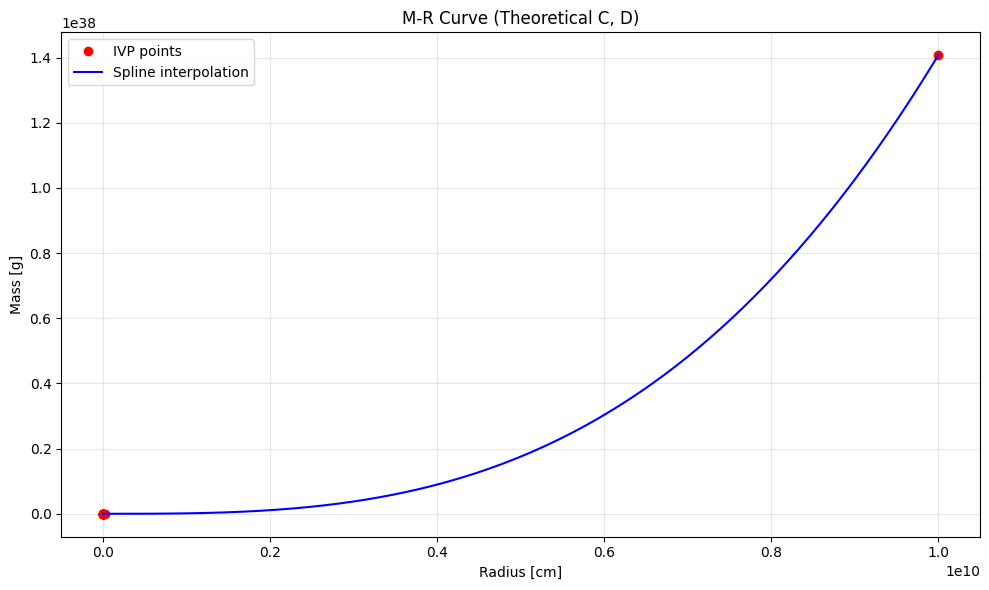


Running with fitted inputs:

Using C=1.694e+12, D=3.333e-06 with 20 IVP points.


Solving IVP for each rhoc: 100%|██████████| 20/20 [02:03<00:00,  6.17s/it]


Max mass from spline ~ 0.000e+00 g at R ~ 1.000e+10 cm


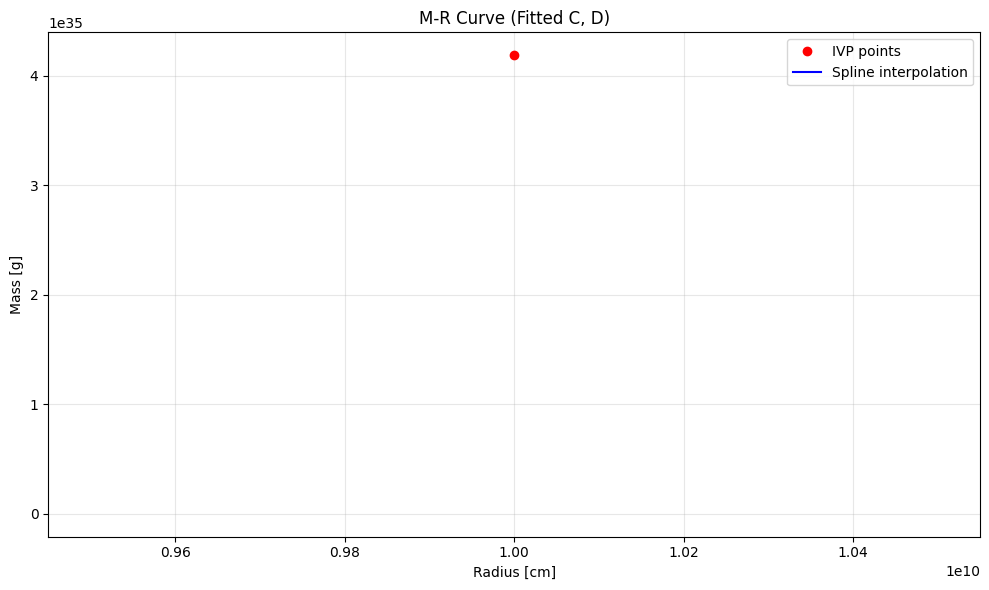

In [31]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from scipy.interpolate import InterpolatedUnivariateSpline
from tqdm import tqdm

# ---------------------------------------------------------------------
# 1) Constants in cgs
# ---------------------------------------------------------------------
G_cgs = 6.6743e-8  # [cm^3 g^-1 s^-2]

# ---------------------------------------------------------------------
# 2) EOS from eq. (8) with q=3
# ---------------------------------------------------------------------
def pressure_eos(rho, C_val, D_val):
    """
    P(rho) = C [ x(2x^2 - 3)*sqrt(1 + x^2) + 3 asinh(x) ], 
    x = (rho / D)^(1/3).
    """
    if rho <= 0:
        return 0.0
    x = (rho / D_val)**(1/3)
    term1 = x*(2*x**2 - 3)*np.sqrt(1 + x**2)
    term2 = 3.0*np.arcsinh(x)
    return C_val*(term1 + term2)

def dPdrho_fd(rho, C_val, D_val):
    """
    Finite-difference approximation of dP/d(rho).
    Helps avoid edge-case singularities in the exact formula.
    """
    if rho <= 0:
        return 0.0
    eps = 1e-10 * rho if rho > 1e-10 else 1e-14
    P_plus = pressure_eos(rho + eps, C_val, D_val)
    if rho > eps:
        P_minus = pressure_eos(rho - eps, C_val, D_val)
    else:
        P_minus = pressure_eos(eps, C_val, D_val)
    return (P_plus - P_minus) / (2.0 * eps)

# ---------------------------------------------------------------------
# 3) Stellar-structure ODE solver
# ---------------------------------------------------------------------
def star_structure_ivp(rho_c, C_val, D_val):
    """
    Solve the hydrostatic structure from r=r_min to r=1e10 (cm).
    Returns (R_star, M_star).
    """
    def odes(r, y):
        m_r, rho_r = y
        if rho_r <= 0:
            return [0.0, 0.0]

        dmdr = 4.0 * np.pi * r**2 * rho_r
        # Avoid division by zero near r=0
        if r < 1e-15:
            dPdr_ = 0.0
        else:
            dPdr_ = -G_cgs * m_r * rho_r / (r**2)

        dpdrho_ = dPdrho_fd(rho_r, C_val, D_val)
        if abs(dpdrho_) < 1e-50:
            drhodr = 0.0
        else:
            drhodr = dPdr_ / dpdrho_

        return [dmdr, drhodr]

    def event_rho_small(r, y):
        # Terminate if rho < 1e-10 * rho_c
        return y[1] - 1e-10*rho_c
    event_rho_small.terminal = True
    event_rho_small.direction = -1

    def event_r_too_large(r, y):
        # Terminate if r > 1e10
        return r - 1e10
    event_r_too_large.terminal = True
    event_r_too_large.direction = 1

    sol = solve_ivp(
        fun=odes,
        t_span=(1e-12, 1e10),
        y0=[0.0, rho_c],
        events=[event_rho_small, event_r_too_large],
        method='BDF',     # or 'LSODA', 'Radau', ...
        max_step=1e6,
        rtol=1e-7,
        atol=1e-10
    )

    R_star = sol.t[-1]
    M_star = sol.y[0, -1]
    return R_star, M_star

# ---------------------------------------------------------------------
# 4) Generate a table of (rho_c -> R, M) points, then build a spline
# ---------------------------------------------------------------------
def compute_MR_table(C_val, D_val, N=20):  # <-- changed default to 20
    """
    Compute M-R data for N points in rho_c.
    Return (rhoc_array, R_vals, M_vals, spline_M_of_R).
    """
    # You can widen the range if you want more or less coverage
    rho_c_min = 1e5
    rho_c_max = 1e11
    rhoc_array = np.logspace(np.log10(rho_c_min), np.log10(rho_c_max), N)

    M_vals = []
    R_vals = []

    for rc in tqdm(rhoc_array, desc="Solving IVP for each rhoc"):
        R_star, M_star = star_structure_ivp(rc, C_val, D_val)
        R_vals.append(R_star)
        M_vals.append(M_star)

    R_vals = np.array(R_vals)
    M_vals = np.array(M_vals)

    # 1) Sort (R, M) by ascending R
    idx_sort = np.argsort(R_vals)
    R_sorted = R_vals[idx_sort]
    M_sorted = M_vals[idx_sort]

    # 2) Remove duplicates so the spline won't choke
    #    We keep only unique values of R (strictly increasing).
    dR = np.diff(R_sorted)
    nonzero = np.where(dR > 0.0)[0]
    # keep the first point plus all indices where dR > 0
    keep_idx = np.concatenate(([0], nonzero + 1))
    R_unique = R_sorted[keep_idx]
    M_unique = M_sorted[keep_idx]

    # Now build the spline, only if there's at least 2 unique points
    if len(R_unique) < 2:
        # If no valid points, create a dummy "constant" spline
        # or just raise an error. We'll do a dummy spline here:
        def dummy_spline(x): 
            return np.zeros_like(x)
        return rhoc_array, R_unique, M_unique, dummy_spline

    spline_M_of_R = InterpolatedUnivariateSpline(R_unique, M_unique, k=3)

    return rhoc_array, R_unique, M_unique, spline_M_of_R

# ---------------------------------------------------------------------
# 5) Example usage with higher resolution in the final plot
# ---------------------------------------------------------------------
def main(C_val, D_val, title="", savename=""):
    print(f"\nUsing C={C_val:.3e}, D={D_val:.3e} with 20 IVP points.")
    # Increase N to 20 or more for better coverage
    rhoc_array, R_vals, M_vals, spline_M_of_R = compute_MR_table(C_val, D_val, N=20)

    # Evaluate spline with a finer resolution of, say, 300 points
    R_fine = np.linspace(min(R_vals), max(R_vals), 300)  # <-- changed to 300
    M_fine = spline_M_of_R(R_fine)

    # Identify max mass
    imax = np.argmax(M_fine)
    print(f"Max mass from spline ~ {M_fine[imax]:.3e} g at R ~ {R_fine[imax]:.3e} cm")

    plt.figure(figsize=(10, 6))
    plt.plot(R_vals, M_vals, 'ro', label='IVP points')
    plt.plot(R_fine, M_fine, 'b-', label='Spline interpolation')
    plt.xlabel("Radius [cm]")
    plt.ylabel("Mass [g]")
    plt.title(title)
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    if savename:
        plt.savefig(savename, bbox_inches='tight')
    plt.show()

if __name__ == "__main__":
    print("Running with theoretical inputs:")
    main(C_val=3.6e21, D_val=2.0e13,
         title="M-R Curve (Theoretical C, D)",
         savename="Newton_PartE2_theoretical.pdf")

    print("\nRunning with fitted inputs:")
    main(C_val=1.6938e12, D_val=3.3333e-6,
         title="M-R Curve (Fitted C, D)",
         savename="Newton_PartE2_calculated.pdf")
